# Credit Risk Assessment: A Data Challenge

## Objective 
We would like to assess the risk of credit borrowers' default based on the payment trends and their public records. The goal of data challenge is to find a viable method to detect individuals with a tendency to make late payment and/or default, and develop a model for predicting late payments. 

We will start by importing the csv files as the main data. Then, the data dictionaries. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import the data 
Home = '/Users/ercagpince/Documents/Data_Challenges/'
Loan_File = 'Credit_Risk_Loan_performance.csv'
Public_File = 'Credit_Risk_Public_records.csv'

Loan_Data = pd.read_csv(r'' + Home + Loan_File)

In [3]:
#An initial look on the loan data 
Loan_Data.head()

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346745,2500,0,0,0
1,1346746,1000,0,0,0
2,1346747,1002,0,0,0
3,1346748,1500,0,0,0
4,1346749,1675,0,0,0


In [4]:
#Import the public records data 
Public_Rec = pd.read_csv(r'' + Home + Public_File)

In [5]:
#An initial look on the public records data
Public_Rec.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number
0,1346747,ZP,99,CJ,20130604.0,20130129,NaN,1209.0,CI,I,1,NaN,NaN,NaN
1,1346748,ZP,485,7X,20140925.0,20140506,20140924.0,NaN,FE,I,1,NaN,NaN,NaN
2,1346754,Z,11R,SL,20120124.0,20110405,NaN,2248.0,RD,I,1,NaN,NaN,NaN
3,1346754,ZP,1,7X,20130129.0,20120928,20130128.0,NaN,FE,C,1,NaN,NaN,NaN
4,1346756,ZP,1,RL,20140913.0,20070202,20140801.0,406.0,RD,I,1,NaN,NaN,NaN


In [6]:
#Importing all the tabs in the Excel file ("Data_Dictionary") 

xls_metadata = pd.ExcelFile(r'' + Home + 'Credit_Risk_Data_dictionary.xlsx')

Dicts = list()
for sheet in xls_metadata.sheet_names[0:2]:
    Dicts.append(pd.read_excel(r'' + Home + 'Credit_Risk_Data_dictionary.xlsx', sheet))

Codes = list()
for sheet in xls_metadata.sheet_names[2:]:
    Codes.append(pd.read_excel(r'' + Home + 'Credit_Risk_Data_dictionary.xlsx', sheet))

In [7]:
Public_Dict = Dicts[0]
Loan_Dict = Dicts[1]

PublicRec_Codes = Codes[0]
PublicSourceRec_Codes = Codes[1]

In [8]:
PRS_Codes = PublicSourceRec_Codes.set_index('Public Record Source Type Code:')['Description:'].to_dict()
PR_Codes = PublicRec_Codes.set_index('Public Record Type Code:')['Description:'].to_dict()
print(PRS_Codes)
print(PR_Codes)

{'AS': 'Associate Court', 'BK': 'U.S. Bankruptcy Court', 'CA': 'County Auditor', 'CC': 'County Clerk', 'CI': 'Circuit Court', 'CL': 'County Court at Law', 'CN': 'Conciliation Court', 'CP': 'Common Pleas', 'CR': 'County Recorder', 'CT': 'County Court', 'CY': 'City Court', 'DC': 'District Court', 'FE': 'Federal District', 'JU': 'Justice of the PeaceCourt type', 'MA': 'Magistrate Court', 'MU': 'Municipal Court', 'PC': 'Parish Court', 'RD': 'Recorder of Deeds', 'SC': 'Small Claims', 'SU': 'Superior Court'}
{'1D': 'Chapter 11 Bankruptcy Dismissed', '1F': 'Chapter 11 Bankruptcy Filing', '1X': 'Chapter 11 Bankruptcy Discharged', '2D': 'Chapter 12 Bankruptcy Dismissed', '2F': 'Chapter 12 Bankruptcy Filing', '2X': 'Chapter 12 Bankruptcy Discharged', '3D': 'Chapter 13 Bankruptcy Dismissed', 'CJ': 'Civil Judgment', 'CP': 'Child Support', 'FC': 'Foreclosure', 'FT': 'Federal Tax Lien', 'JL': 'Judicial Lien', 'PC': 'Paid Civil Jugment'}


## Exploratory Data analysis

We converted the dictionaries and codes into Pandas dataframes, and codes to Python dictionaries.

It looks like some of the columns' format should be rendered to datetime and boolean. What are those? 
- late_30_days, late_60_days & late_90_days in Loan_Data should be cast Boolean
- effective_date_date_verified, filed_date, paid_date should be cast datetime 

In [9]:
Public_Rec.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number
0,1346747,ZP,99,CJ,20130604.0,20130129,NaN,1209.0,CI,I,1,NaN,NaN,NaN
1,1346748,ZP,485,7X,20140925.0,20140506,20140924.0,NaN,FE,I,1,NaN,NaN,NaN
2,1346754,Z,11R,SL,20120124.0,20110405,NaN,2248.0,RD,I,1,NaN,NaN,NaN
3,1346754,ZP,1,7X,20130129.0,20120928,20130128.0,NaN,FE,C,1,NaN,NaN,NaN
4,1346756,ZP,1,RL,20140913.0,20070202,20140801.0,406.0,RD,I,1,NaN,NaN,NaN


In [10]:
#Dates
Public_Rec['filed_date'] = pd.to_datetime(Public_Rec['filed_date'], format = '%Y%m%d')
Public_Rec['effective_date_date_verified'] = pd.to_datetime(Public_Rec['effective_date_date_verified'], format = '%Y%m%d')
Public_Rec['paid_date'] = pd.to_datetime(Public_Rec['paid_date'], format = '%Y%m%d')

In [11]:
#Booleans in Loan Performance data 
Loan_Data['late_30_days'] = Loan_Data['late_30_days'].map({1: True, 0: False})
Loan_Data['late_60_days'] = Loan_Data['late_60_days'].map({1: True, 0: False})
Loan_Data['late_90_days'] = Loan_Data['late_90_days'].map({1: True, 0: False})

In [12]:
Loan_Data.head()

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346745,2500,False,False,False
1,1346746,1000,False,False,False
2,1346747,1002,False,False,False
3,1346748,1500,False,False,False
4,1346749,1675,False,False,False


Some of the public record codes popping up in the dataframe are missing in the dictionaries from the XLSX file.

In [13]:
PR_Codes['PF']

KeyError: 'PF'

In [14]:
PR_allcodes = list(pd.unique(Public_Rec['public_record_type_code']))

In [15]:
PR_codes_rest = [i for i in PR_allcodes if i not in list(PR_Codes.keys())]

The codes that were not included to the dictionary are now stored in the list "PR_codes_rest".

Let's find out if the customers who are 30 days late were also late for 60 and 90 days <u>in other instances of loaning</u>. 

In [16]:
#Customers late for 30, 60 & 90 days
All_three_cond = (Loan_Data[['late_30_days','late_60_days', 'late_90_days']].all(axis = 1))
All_three_late = Loan_Data[All_three_cond] 

In [17]:
#Customers late in only two time lines
First_condition = (Loan_Data['late_30_days'] == True) & (Loan_Data['late_60_days'] == True) & (Loan_Data['late_90_days'] == False) 
Second_condition = (Loan_Data['late_30_days'] == True) & (Loan_Data['late_60_days'] == False) & (Loan_Data['late_90_days'] == True)
Third_condition = (Loan_Data['late_30_days'] == False) & (Loan_Data['late_60_days'] == True) & (Loan_Data['late_90_days'] == True)

Two_late_cond = First_condition | Second_condition | Third_condition 
Only_two_late = Loan_Data[Two_late_cond]

In [18]:
len(Only_two_late)

6434

Some customers returned their loans at least 30 days and 60 days later in two separate instances. Next, we'll calculate the total numbers of customers who paid a loan late in all three categories. 

In [19]:
Only_two_late.sample(5)

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
177957,1524713,3770,True,True,False
435278,1782051,1390,True,True,False
597426,1944203,1039,True,True,False
311275,1658042,2500,True,True,False
373870,1720639,1354,True,True,False


The customers who never paid 30 days late do not show up in multiple samplings. This might mean that someone who has never paid 30 days late is very unlikely to be 60 days or 90 days late in their loan payments. We'll define a third condition to check this case. 

In [20]:
Third_condition = (Loan_Data['late_30_days'] == False) & (Loan_Data['late_60_days'] == True) & (Loan_Data['late_90_days'] == True)

In [21]:
Loan_Data[Third_condition]

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days


Indeed, no customer fails to pay a loan in 60 and 90 days after having paid another one less than 30 days later. This is an indicator of consistency on the customers who are paying on time or in less than 30 days. 

Next, we'll investigate the rates of these classes. First, we’ll identify the customers who had a delayed payment only once. 

In [22]:
#Customers late only in single timeline 

First_only_one = (Loan_Data[['late_30_days','late_60_days', 'late_90_days']].any(axis = 1)) 

Only_one_cond = First_only_one & ~(Two_late_cond) & ~(All_three_cond)
Only_one_late = Loan_Data[Only_one_cond]
Only_one_late.head()

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
8,1346753,1439,True,False,False
45,1346790,1282,True,False,False
58,1346803,3500,True,False,False
65,1346810,2600,True,False,False
72,1346817,2000,True,False,False


In [23]:
#Customers who paid on time 
All_clear_cond = ~First_only_one 
All_clear = Loan_Data[All_clear_cond]

All_clear.head()

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346745,2500,False,False,False
1,1346746,1000,False,False,False
2,1346747,1002,False,False,False
3,1346748,1500,False,False,False
4,1346749,1675,False,False,False


In [24]:
#Let's find out the rates for late payments 

n_one = len(Only_one_late)
n_two = len(Only_two_late)
n_three = len(All_three_late)
n_none = len(All_clear)

sum_lates = n_one + n_two + n_three + n_none

n_all = len(Loan_Data) 

# print(n_one)
# print(n_two)
# print(n_three)
# print(n_none)

# print(n_all)
# print(sum_lates) # The number checks out! 

rate_one = n_one / n_all 
rate_two = n_two / n_all 
rate_three = n_three / n_all 
rate_none = n_none / n_all 

rates = [rate_one, rate_two, rate_three, rate_none]

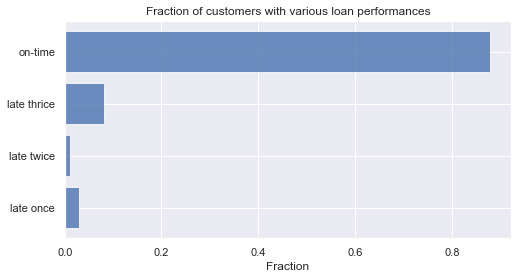

In [40]:
plot_labels = ('late once', 'late twice', 'late thrice', 'on-time') 
plt.figure(figsize = (8, 4)) 
y_pos = np.arange(len(plot_labels))
plt.barh(y_pos, rates, align = 'center', alpha = 0.8)
plt.yticks(y_pos, plot_labels)

plt.xlabel('Fraction')
plt.title('Fraction of customers with various loan performances') 
plt.show()

The majority of customers pays their loans on time or less than 30 days later, as expected. Interestingly, the fraction of those who are late in payment for twice is significantly lower than the two other categories. 

### General Questions 
1. Is there a correlation between the maximum amount of loan and delayed payment? 
2. Which ones of these "late" categories were sued?
3. What fraction of the late payers did file for bankruptcy?

### Model Questions 
1. What’s the probability that a customer filed for bankruptcy will have a delayed payment? 
2. Same question goes for other categories.  

We should start by binning these people by their PRT codes and check if they have delayed a payment before. 

In [27]:
Public_Rec.sample(5)

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number
176499,1868239,ZP,37,PC,2015-01-29,2013-03-27,2014-12-29,1041.0,CI,C,2,NaN,NaN,NaN
181092,1882112,ZP,13V,7X,2009-12-05,2009-08-10,2009-12-03,NaN,FE,C,1,NaN,NaN,NaN
35619,1452412,ZP,157,PC,2011-09-16,2010-12-08,2011-08-30,656.0,CI,I,2,NaN,NaN,NaN
144537,1775631,ZP,632,7X,2014-04-09,2014-01-06,2014-04-08,NaN,FE,I,1,NaN,NaN,NaN
171247,1853172,ZP,25N,RL,2013-04-24,2012-11-14,2013-04-05,1109.0,RD,I,1,NaN,NaN,NaN


In [28]:
#Aggregate the public record type codes and count them 
Public_Rec.groupby(['public_record_type_code']).count()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number
public_record_type_code,,,,,,,,,,,,,
1D,14,14,14,14,14,14,0,14,14,14,0,0,0
1F,1,1,1,1,1,0,0,1,1,1,0,0,0
1X,11,11,11,11,11,11,0,11,11,11,0,0,0
2D,2,2,2,2,2,2,0,2,2,2,0,0,0
2F,2,2,2,2,2,0,0,2,2,2,0,0,0
2X,3,3,3,3,3,3,0,3,3,3,0,0,0
3D,4356,4356,4356,4356,4356,4356,0,4356,4356,4356,0,0,0
3F,2184,2184,2184,2162,2184,1,0,2184,2184,2184,0,0,0
3X,3500,3500,3500,3500,3500,3498,0,3500,3500,3500,0,0,0


In [29]:
#Query the count of separate entries per customer and sort them
Public_Rec.groupby(['analytics_matchkey'])['public_record_type_code'].count().sort_values(ascending = False)

analytics_matchkey
1452992    87
1366619    86
1470959    46
1976457    41
1913669    34
           ..
1604791     1
1604789     1
1604781     1
1604779     1
1670218     1
Name: public_record_type_code, Length: 134717, dtype: int64

In [30]:
Public_Rec[Public_Rec['analytics_matchkey'] == 1366619].groupby(['public_record_type_code']).count()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number
public_record_type_code,,,,,,,,,,,,,
FT,1,1,1,1,1,0,1,1,1,1,0,0,0
SL,85,85,85,85,85,0,85,85,85,85,0,0,0


Some customers have more than one public record entries in multiple categories (i.e, public record source type code). Next, we'll query the PRT code counts to obtain the number of cases per public record category.

In [31]:
PRT_codes_binned = Public_Rec.groupby(['public_record_type_code'])['analytics_matchkey'].count()

In [32]:
PRT_codes_binned

public_record_type_code
1D       14
1F        1
1X       11
2D        2
2F        2
2X        3
3D     4356
3F     2184
3X     3500
7D     1109
7F      487
7X    49842
CB    10266
CJ    61425
CP      301
FT     6511
PC    30449
PF     3591
PL     6172
RL    20099
SL    16205
TB        9
TL     1764
Name: analytics_matchkey, dtype: int64

In [33]:
#Define a cut-off value to bin smaller PRT_codes count in "others" 
bin_cutoff = 1500 

PRT_codes_binned['others'] = PRT_codes_binned[PRT_codes_binned < bin_cutoff].sum()
index_to_drop =  PRT_codes_binned[PRT_codes_binned < bin_cutoff].index
PRT_codes_binned_reduce = PRT_codes_binned.drop(list(index_to_drop))

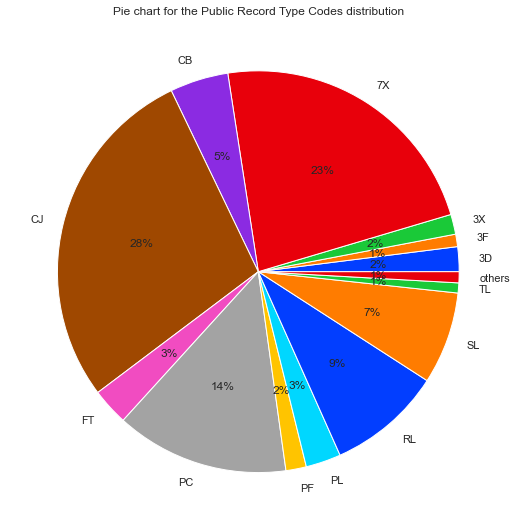

In [34]:
#Pie chart for the PRT_code distribution 

labels = list(PRT_codes_binned_reduce.index)
palette_color = sns.color_palette('bright')
sns.set(rc={"figure.figsize":(9, 12)}) #width=3, #height=4

plt.pie(PRT_codes_binned_reduce, labels = labels, colors = palette_color,autopct='%.0f%%')
plt.title('Pie chart for the Public Record Type Codes distribution')

plt.show()

Almost half of the cases belongs to either civil judgements or chapter 7 bankruptcy charges. 

**Q:** What is the mean amount owed per case type? 

In [35]:
Public_Rec.groupby(['public_record_type_code'])['amount'].mean()

public_record_type_code
1D             NaN
1F             NaN
1X             NaN
2D             NaN
2F             NaN
2X             NaN
3D             NaN
3F             NaN
3X             NaN
7D             NaN
7F             NaN
7X             NaN
CB     5245.237386
CJ     3156.834481
CP     7714.116279
FT    33204.594225
PC     1792.190745
PF    23991.086048
PL     1843.071776
RL     2582.234987
SL     3237.531132
TB    11738.777778
TL      575.713719
Name: amount, dtype: float64

Not all the amounts of debt in the bankruptcy cases were disclosed or added to the dataset. 

**Q:** What’s the average number of days for a debtor to pay the delinquent amount?

In [36]:
Public_Rec['days_to_pay'] = (Public_Rec['paid_date'] - Public_Rec['filed_date']).apply(lambda x: x.days)

In [37]:
Public_Rec[["analytics_matchkey", "days_to_pay"]].head()

,analytics_matchkey,days_to_pay
0,1346747,NaN
1,1346748,141.0
2,1346754,NaN
3,1346754,122.0
4,1346756,2737.0


In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
mean_days_to_pay = Public_Rec.groupby(['public_record_type_code'])['days_to_pay'].mean()

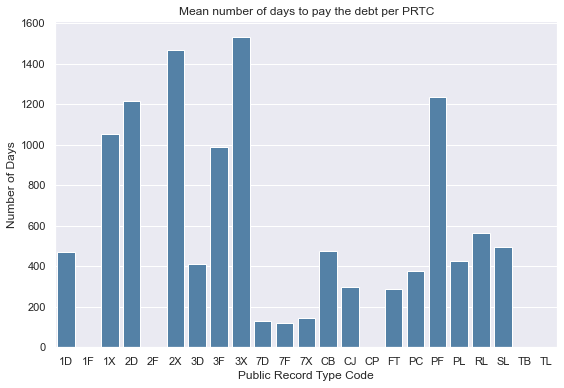

In [39]:
mean_days_fig = sns.barplot(x = mean_days_to_pay.index, y = mean_days_to_pay.values, color ='steelblue')
plt.xlabel('Public Record Type Code')
plt.ylabel('Number of Days')
plt.title('Mean number of days to pay the debt per PRTC')

mean_days_fig.figure.set_size_inches(9,6)
plt.show()

Some bins are missing as a number of rows in the public records dataframe do not contain the dates at which the full amount is paid (i.e., "paid_date"). The types 1F & 2F are missing those values as these classes belong to the bankruptcy filings. 

**Q**: What is the average amount borrowed per case type? 

In [41]:
## Mean delinquent amount per PRTC
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mean_amount = Public_Rec.groupby(['public_record_type_code'])['amount'].mean()

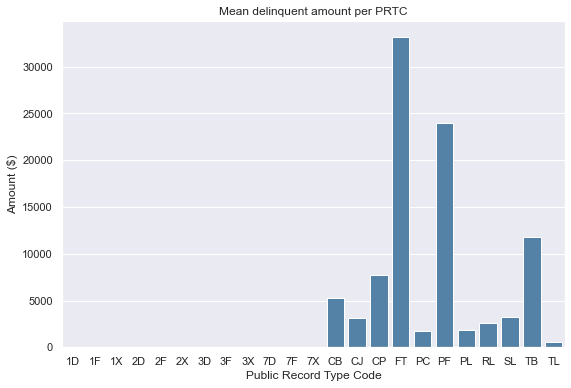

In [42]:
mean_amount_fig = sns.barplot(x = mean_amount.index, y = mean_amount.values, color = 'steelblue')
#sns.set(rc={"figure.figsize":(3, 4)}) #width=3, #height=4
plt.xlabel('Public Record Type Code')
plt.ylabel('Amount ($)')
plt.title('Mean delinquent amount per PRTC')

mean_amount_fig.figure.set_size_inches(9,6)
plt.show()

The amount on bankruptcy cases were not disclosed . **The Federal Tax Lien is the cause for the highest mean debt owed to the creditors.** 

## The distribution of debt 

**Q:** How does the distribution of the amount of debt look? 

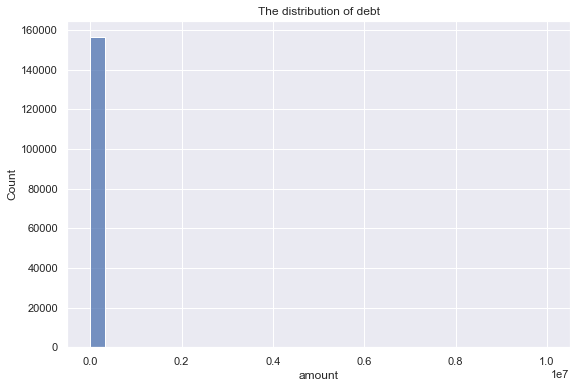

In [43]:
plt.figure(figsize = (9, 6)) 
sns.histplot(data = Public_Rec, x = 'amount', bins = 30)
plt.title('The distribution of debt') 
plt.show()

The distribution is heavily skewed towards zero, but there may be data points at the tail overshadowed by the peak at 0.0. 

In [44]:
#Let's check the statistics 
amount_summary = Public_Rec['amount'].describe()
print(amount_summary)

count    156792.00
mean       4616.67
std       41800.84
min           0.00
25%         644.00
50%        1338.00
75%        3174.00
max     9999999.00
Name: amount, dtype: float64


In [45]:
Public_Rec[Public_Rec.amount == amount_summary['max']]

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number,days_to_pay
35358,1451690,Z,11J,PF,2012-03-06,2009-09-24,2012-02-28,9999999.00,RD,I,1,NaN,NaN,NaN,887.00
186714,1898185,ZP,141,RL,2010-07-09,2009-12-28,2010-06-25,9999999.00,RD,I,1,NaN,NaN,NaN,179.00


Given the large standard deviation and maximum values in the amounts, these two are likely the outliers. Next, we'll sort the values in descending order and look deeper into the peak values.

In [46]:
Public_Rec.sort_values(by = ['amount'], ascending = False).head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number,days_to_pay
35358,1451690,Z,11J,PF,2012-03-06,2009-09-24,2012-02-28,9999999.00,RD,I,1,NaN,NaN,NaN,887.00
186714,1898185,ZP,141,RL,2010-07-09,2009-12-28,2010-06-25,9999999.00,RD,I,1,NaN,NaN,NaN,179.00
126489,1721497,ZP,365,RL,2010-10-13,2008-07-16,2010-09-02,2696174.00,RD,I,1,NaN,NaN,NaN,778.00
82904,1591558,ZP,447,PF,2007-04-11,2007-04-11,2010-07-01,1912871.00,RD,I,1,NaN,NaN,NaN,1177.00
196368,1926409,ZP,430,FT,2015-03-31,2014-10-27,NaT,1625836.00,RD,I,1,NaN,NaN,NaN,NaN


There are more than 10 debtors with 1M+ balance sheet. The exact number is,  

In [47]:
Public_Rec[Public_Rec['amount'] >= 1e6]['analytics_matchkey'].count()

19

19 people seem to bear larger debt. 

Below, we build the rank order on the sorted data and visualize how the debt increases from smaller values. 

In [48]:
Amounts = Public_Rec.sort_values(by = ['amount'], ascending = True)['amount']

In [49]:
Amounts

211822   0.00
209291   0.00
163310   0.00
33979    0.00
160479   0.00
         ... 
218295    NaN
218298    NaN
218300    NaN
218301    NaN
218302    NaN
Name: amount, Length: 218303, dtype: float64

In [50]:
#Remove NaNs
Amounts = Amounts[~np.isnan(Amounts)] 

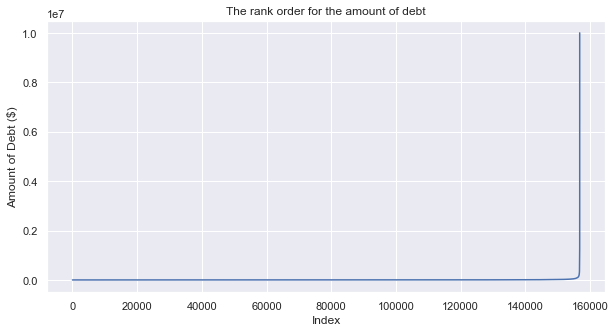

In [51]:
plt.figure(figsize = (10, 5)) 
plt.plot(Amounts.values)
plt.xlabel('Index')
plt.ylabel('Amount of Debt ($)')
plt.title('The rank order for the amount of debt')
plt.show()

The two extreme values for debt peak at around $10M. 

We shall calculate the mean and standard deviation of the amounts set. Then, we'll check how the statistics changes ignoring these two peak values. 

In [52]:
#Change the Pandas output format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Gather stastistics of the debts
Amounts.describe()

count    156792.000
mean       4616.669
std       41800.839
min           0.000
25%         644.000
50%        1338.000
75%        3174.000
max     9999999.000
Name: amount, dtype: float64

In [53]:
#The mean and std of the sorted amounts with the last two max values 
print("Mean, median and std of the amounts set") 
print("Mean = %.3f" % Amounts.mean()) 
print("Median = %.3f" % Amounts.median()) 
print("STD = %.3f" % Amounts.std())

Mean, median and std of the amounts set
Mean = 4616.669
Median = 1338.000
STD = 41800.839


In [54]:
#The mean and std of the sorted amounts without the last two max values 
print("Mean, median and std of the amounts set without two max values") 
print("Mean = %.3f" % Amounts[:-2].mean()) 
print("Median = %.3f" % Amounts[:-2].median()) 
print("STD = %.3f" % Amounts[:-2].std())

Mean, median and std of the amounts set without two max values
Mean = 4489.169
Median = 1338.000
STD = 21746.133


The standard deviation value dropped nearly by half after removal of the two extreme values . They are good candidates to be outliers. 

In the following cell, we find out how the data is binned from 0 to the maximum value (i.e., 9999999.0).

In [55]:
#Let's check the individual bins of the initial amount histogram 
Amount_Hist = np.histogram(Amounts, bins = 30)
Amount_Hist

(array([156708,     58,      7,     12,      3,      1,      0,      0,
             1,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      2]),
 array([      0. ,  333333.3,  666666.6,  999999.9, 1333333.2, 1666666.5,
        1999999.8, 2333333.1, 2666666.4, 2999999.7, 3333333. , 3666666.3,
        3999999.6, 4333332.9, 4666666.2, 4999999.5, 5333332.8, 5666666.1,
        5999999.4, 6333332.7, 6666666. , 6999999.3, 7333332.6, 7666665.9,
        7999999.2, 8333332.5, 8666665.8, 8999999.1, 9333332.4, 9666665.7,
        9999999. ]))

The binnings show a large cluster of data points between 0 and $333k followed by only 100 data points.

Let's plot a box-plot and analyze the interquartile range to describe the behavior at the end of the distribution. This will help us to spot outliers visually. 

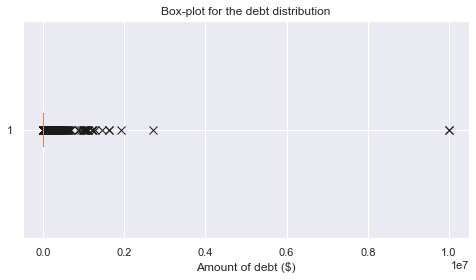

In [56]:
plt.figure(figsize = (8, 4))
outlier_dict =  dict(marker='x', markeredgecolor='k', markersize = 8)

plt.boxplot(Amounts,vert = False, flierprops = outlier_dict)

plt.xlabel('Amount of debt ($)') 
plt.title('Box-plot for the debt distribution') 
plt.show()

Next, we will calculate the interquartile range for outlier statistics.

In [57]:
#Calculate the interquartile range of the amount data 
Q1 =  Amounts.describe()['25%']
Q3 = Amounts.describe()['75%']
IQR = Q3 - Q1 

#Calculate the upper and lower fences as they are not seen on the box-plot
LF = Q1 - (1.5 * IQR)
UF = Q3 + (1.5 * IQR)

print("Lower fence = ", LF) 
print("Upper fence = ", UF) 
print("Median = %.3f" % Amounts.median()) 

Lower fence =  -3151.0
Upper fence =  6969.0
Median = 1338.000


The outliers start even before $10k. The distribution contains some extreme values. 

We can fit a gamma-distribution to the data once we remove two extreme values by defining a cut-off at $3M. 

In [58]:
#Visualize the distribution for the amount of debt below the cutoff value 

import scipy.stats as stats
gamma = stats.gamma

cutoff = 3e6 

#Fitting a generalized gamma function 
shape, loc, scale = gamma.fit(Amounts[Amounts <  cutoff], floc = -125)
print(shape, loc, scale)

x =  np.linspace(0,cutoff,10000)
y = gamma.pdf(x, shape, loc, scale)

0.6226129569958788 -125 7410.974982008679


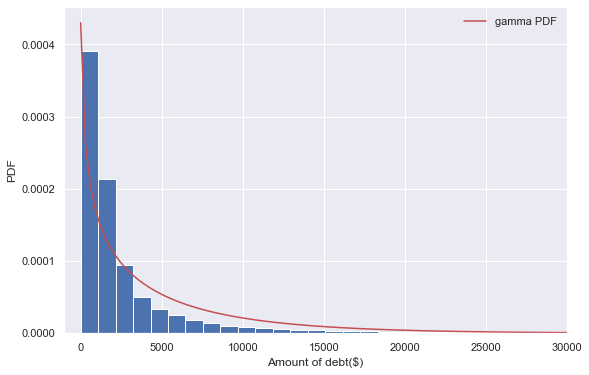

In [59]:
plt.figure(figsize = (9, 6)) 

plt.plot(x, y,'r', label = 'gamma PDF')

plt.hist(Amounts[Amounts < cutoff], bins = 2500, density = True)
plt.xlabel('Amount of debt($)')
plt.ylabel('PDF')
ax = plt.gca()
ax.set_xlim([-1e3, 3e4])
ax.legend(loc='best', frameon=False)

plt.show()

The fitted distribution seems to have a long-tail. A distribution with a slow-decaying tail, such as [Benini distribution](https://en.wikipedia.org/wiki/Benini_distribution), might be a better representation of the trend of the amount data in this case. 

## KNN-approach for detecting outliers

To detect the outliers and extreme value more systematically, we'll employ K-nearest neighbors method and calculate mean-k distances.  

In [60]:
from sklearn.neighbors import NearestNeighbors

#Drop None values from the data
Amounts_OA = Public_Rec[['analytics_matchkey','amount']].dropna()  

nbr = NearestNeighbors(n_neighbors = 4)
nbr.fit(Amounts_OA.values) 

distances, indices = nbr.kneighbors(Amounts_OA.values)

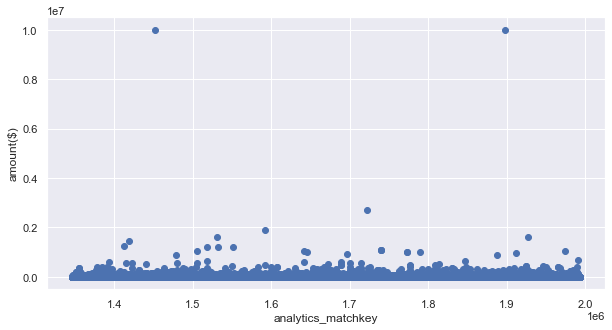

In [61]:
plt.figure(figsize = (10, 5)) 
plt.scatter(Amounts_OA.values[:,0], Amounts_OA.values[:,1])
plt.xlabel('analytics_matchkey') 
plt.ylabel('amount($)')
plt.show()

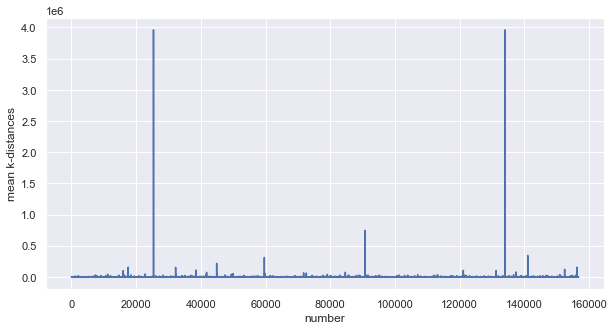

In [62]:
plt.figure(figsize = (10, 5)) 
plt.plot(distances.mean(axis = 1))
plt.xlabel('number')
plt.ylabel('mean k-distances') 
plt.show()

In [63]:
#I shall define a cut-off distance to isolate outliers 
d_critical = 2.5e5
anomaly_index = np.where(distances.mean(axis = 1) > d_critical)
anomaly_index = anomaly_index[0]

Text(0, 0.5, 'amount($)')

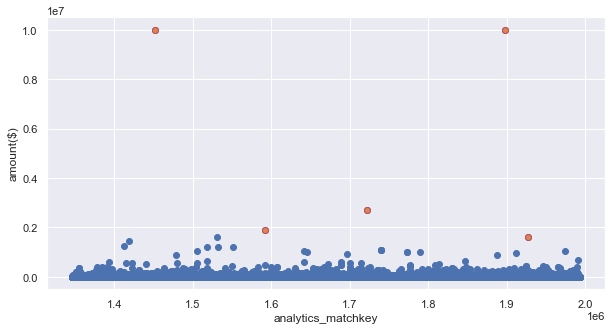

In [64]:
plt.figure(figsize = (10, 5)) 
plt.scatter(Amounts_OA.values[:,0], Amounts_OA.values[:,1])
plt.scatter(Amounts_OA.values[anomaly_index,0], Amounts_OA.values[anomaly_index,1], edgecolors = 'r')
plt.xlabel('analytics_matchkey') 
plt.ylabel('amount($)')

Let's see the detected outliers on the dataframe.

In [65]:
anomaly_matchkey = (Amounts_OA.values[anomaly_index,0]).astype(int)
#Select outliers
Public_Rec[Public_Rec['analytics_matchkey'].apply(lambda x: np.any(x == anomaly_matchkey))].head(5)

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number,days_to_pay
35356,1451690,Z,11J,SL,2014-10-01,2014-09-17,NaT,2957.000,RD,I,1,NaN,NaN,NaN,NaN
35357,1451690,Z,11J,PF,2013-12-18,2010-11-15,2013-12-04,16153.000,RD,I,1,NaN,NaN,NaN,1115.000
35358,1451690,Z,11J,PF,2012-03-06,2009-09-24,2012-02-28,9999999.000,RD,I,1,NaN,NaN,NaN,887.000
82904,1591558,ZP,447,PF,2007-04-11,2007-04-11,2010-07-01,1912871.000,RD,I,1,NaN,NaN,NaN,1177.000
126487,1721497,ZP,381,CJ,2014-09-23,2014-09-16,NaT,9040.000,CI,I,1,NaN,NaN,NaN,NaN


The aggregate amount of debt per debtor might be a more robust metric to target the outliers, as shown below.

In [66]:
Amount_per_debtor = Public_Rec.groupby(['analytics_matchkey'])['amount'].sum()

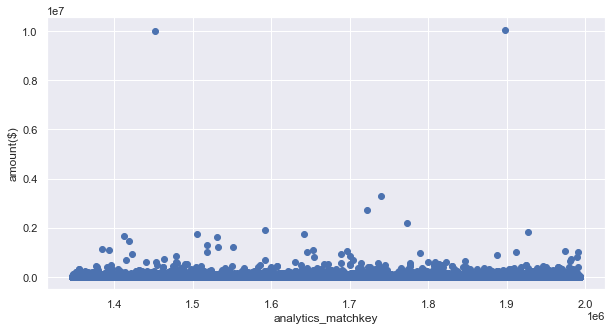

In [67]:
plt.figure(figsize = (10, 5)) 
plt.scatter(Amount_per_debtor.index, Amount_per_debtor.values)
plt.xlabel('analytics_matchkey') 
plt.ylabel('amount($)')
plt.show()

In [68]:
Amount_per_debtor = Amount_per_debtor.reset_index()

In [69]:
#Find the outliers
nbr.fit(Amount_per_debtor.values)

distances_new, indices_new = nbr.kneighbors(Amount_per_debtor.values)

In [70]:
anomaly_index_per_ind = np.where(distances_new.mean(axis = 1) > 2.5e5)
anomaly_index_per_ind = anomaly_index_per_ind[0]

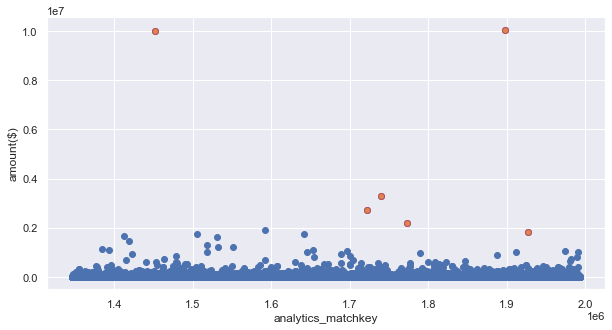

In [71]:
plt.figure(figsize = (10, 5)) 
plt.scatter(Amount_per_debtor.values[:,0], Amount_per_debtor.values[:,1])
plt.scatter(Amount_per_debtor.values[anomaly_index_per_ind,0], Amount_per_debtor.values[anomaly_index_per_ind,1], edgecolors = 'r')
plt.xlabel('analytics_matchkey') 
plt.ylabel('amount($)')
plt.show()

In [72]:
#Select the outliers in the public records dataframe
anomaly_matchkey = (Amount_per_debtor.values[anomaly_index_per_ind,0]).astype(int)
abnormal_debtors = Public_Rec[Public_Rec['analytics_matchkey'].apply(lambda x: np.any(x == anomaly_matchkey))]

In [73]:
#The total amount of debt per individual as an outlier
outliers = abnormal_debtors.groupby('analytics_matchkey')['amount'].sum()
outliers.sort_values(ascending = False, inplace = True) #Sort by the amount of debt 

In [74]:
outliers.head()

analytics_matchkey
1898185   10051826.000
1451690   10019109.000
1739808    3297171.000
1721497    2727464.000
1772271    2195541.000
Name: amount, dtype: float64

We shall check the individuals with largest debt and see if there are any peculiarities about their records.

In [75]:
Public_Rec[Public_Rec['analytics_matchkey'] == outliers.index[0]].head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,plaintiff_name,attorney_name,docket_number,days_to_pay
186711,1898185,Z,191,CJ,2013-02-26,2012-12-14,NaT,4258.000,CI,C,1,NaN,NaN,NaN,NaN
186712,1898185,Z,191,PC,2016-02-09,2012-06-19,2013-03-20,8482.000,CI,C,1,NaN,NaN,NaN,274.000
186713,1898185,ZP,173,CJ,2011-09-16,2011-04-18,NaT,23731.000,CI,I,1,NaN,NaN,NaN,NaN
186714,1898185,ZP,141,RL,2010-07-09,2009-12-28,2010-06-25,9999999.000,RD,I,1,NaN,NaN,NaN,179.000
186715,1898185,ZP,173,RL,2013-05-09,2008-08-18,2013-05-02,15356.000,RD,C,1,NaN,NaN,NaN,1718.000


This individual (1898185) seems to take an order of magnitude longer to pay <span class="tex2jax_ignore">$15k than $10M</span> (see the days_to_pay column above). Likely, the amount shown on the record filed 2009-12-28 is erroneous. We should discard the two extreme values before feeding the data into the model we shall construct. 

### Encoding and Feature selection 
The pre-processing should begin with discarding the irrelevant and incomplete columns out of the public records dataframe.

In [76]:
Public_Rec_subset = Public_Rec.loc[:,('analytics_matchkey',
                                'industry_code_kind_of_business',
                                'public_record_type_code',
                                'public_record_source_type_code',
                                'equal_credit_opportunity_act_code',
                                'legislative_prohibited_code',
                                'amount',
                                'days_to_pay'
                                     )]

In [77]:
Public_Rec_subset.dtypes

analytics_matchkey                     int64
industry_code_kind_of_business        object
public_record_type_code               object
public_record_source_type_code        object
equal_credit_opportunity_act_code     object
legislative_prohibited_code            int64
amount                               float64
days_to_pay                          float64
dtype: object

We must encode the object type of data before fitting the model on them. The options for classifier data are, 
- Basic label encoder
- Ordinal encoder 
- One-hot encoder 
If we follow the one-hot encoding approach, the problems such as curse of dimensionality and multicolinearity may occur. We could end up with the dummy variable trap. 

The basic label encoder might be a good starting point. We shall first identify categorical features and then label-encode each. 

In [78]:
from sklearn import preprocessing

for col in Public_Rec_subset.select_dtypes(include = ['object']).columns:
    encoder = preprocessing.LabelEncoder() 
    
    #Fit the object data 
    encoder.fit(Public_Rec_subset.loc[:,(col)].unique())
    
    #Transform data and insert into the existing Public Record table (you could've used .fit_transform attribute)
    Public_Rec_subset[col] = encoder.transform(Public_Rec_subset.loc[:,(col)])
    
    #Print out the new labels 
    print(f"{col}: {Public_Rec_subset.loc[:,(col)].unique()}")

industry_code_kind_of_business: [1 0]
public_record_type_code: [13 11 20 19 17 12 16  8  6 18 15 10  9  7 22 14  1  0 21  2  5  4  3]
public_record_source_type_code: [ 4 12 17 15  1 18 19  8  3 13 14  9 11  5 10 20  2  6  7  0 16]
equal_credit_opportunity_act_code: [1 0]


Next, we calculate the correlation matrix of all features to see how features are coupling. 

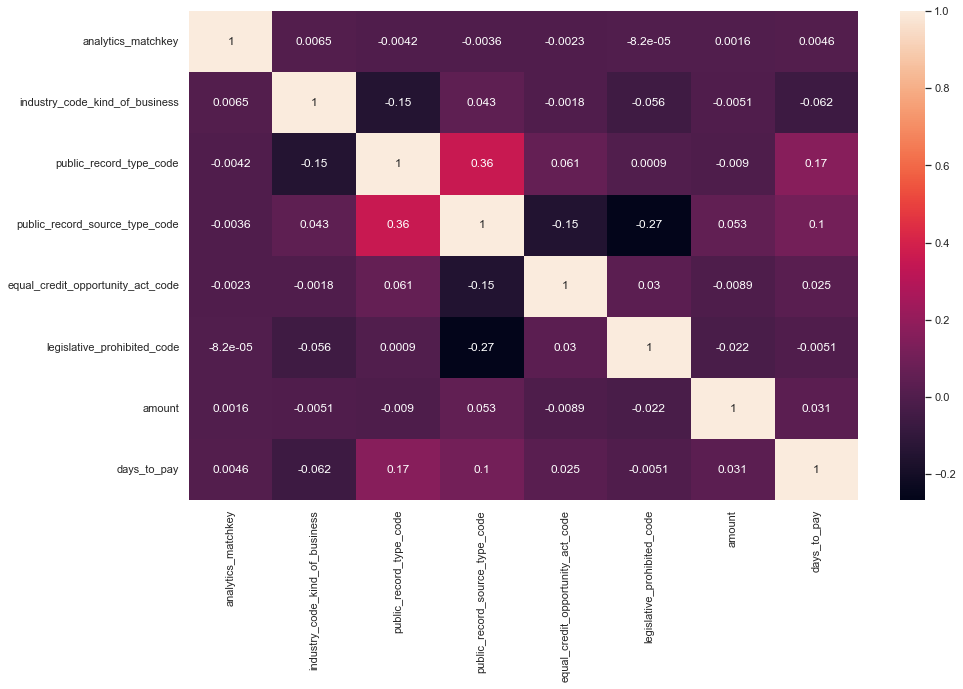

In [79]:
plt.figure(figsize = (15, 9)) 
sns.heatmap(Public_Rec_subset.corr(), fmt = '.2g', annot = True)
plt.show()

Pearson correlation doesn't show any strong signal, as most of these features are categorical.

Now, we can select features based on their k-highest scores. For that, we will measure ANOVA-F through f_classif().

First, we shall join loan performance table with public records to match unique identifier of each customer and slice the labels out from loan performances.

In [80]:
#Join two tables for labeling 

final_table = pd.merge(Public_Rec_subset, Loan_Data, on = 'analytics_matchkey', how = 'inner')

In [81]:
final_table.head()

,analytics_matchkey,industry_code_kind_of_business,public_record_type_code,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,amount,days_to_pay,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346747,1,13,4,1,1,1209.000,NaN,1002,False,False,False
1,1346748,1,11,12,1,1,NaN,141.000,1500,False,False,False
2,1346754,0,20,17,1,1,2248.000,NaN,1025,False,False,False
3,1346754,1,11,12,0,1,NaN,122.000,1025,False,False,False
4,1346756,1,19,17,1,1,406.000,2737.000,2500,False,False,False


In [82]:
#Remove two outliers detected above 

outlier_one = outliers.index[0]
outlier_two = outliers.index[1]

final_table[final_table['analytics_matchkey'] == outlier_one]

,analytics_matchkey,industry_code_kind_of_business,public_record_type_code,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,amount,days_to_pay,max_loan_amount,late_30_days,late_60_days,late_90_days
186711,1898185,0,13,4,0,1,4258.000,NaN,1400,True,True,True
186712,1898185,0,16,4,0,1,8482.000,274.000,1400,True,True,True
186713,1898185,1,13,4,1,1,23731.000,NaN,1400,True,True,True
186714,1898185,1,19,17,1,1,9999999.000,179.000,1400,True,True,True
186715,1898185,1,19,17,0,1,15356.000,1718.000,1400,True,True,True


In [83]:
final_table = final_table.drop(186714)

In [84]:
final_table[final_table['analytics_matchkey'] == outlier_two]

,analytics_matchkey,industry_code_kind_of_business,public_record_type_code,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,amount,days_to_pay,max_loan_amount,late_30_days,late_60_days,late_90_days
35356,1451690,0,20,17,1,1,2957.000,NaN,1325,False,False,False
35357,1451690,0,17,17,1,1,16153.000,1115.000,1325,False,False,False
35358,1451690,0,17,17,1,1,9999999.000,887.000,1325,False,False,False


In [85]:
final_table = final_table.drop(35358)

In [86]:
final_table.head()

,analytics_matchkey,industry_code_kind_of_business,public_record_type_code,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,amount,days_to_pay,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346747,1,13,4,1,1,1209.000,NaN,1002,False,False,False
1,1346748,1,11,12,1,1,NaN,141.000,1500,False,False,False
2,1346754,0,20,17,1,1,2248.000,NaN,1025,False,False,False
3,1346754,1,11,12,0,1,NaN,122.000,1025,False,False,False
4,1346756,1,19,17,1,1,406.000,2737.000,2500,False,False,False


In [87]:
final_table_temp = final_table.drop(['days_to_pay'], axis = 1 )

In [88]:
final_table_temp.dropna(inplace = True)

In [89]:
final_table.dtypes

X = final_table_temp.loc[:,('industry_code_kind_of_business',
                       'public_record_type_code',
                       'public_record_source_type_code', 
                       'equal_credit_opportunity_act_code',
                       'legislative_prohibited_code',
                       'amount',
                            )
                        ]

In [90]:
#Remove NaNs to preprocess the feature matrix as model inputs 
X.dropna(inplace = True) 

## Model for late payments 
In this section, we implement logistic regression and random forest models in scikit learn framework and train the data on the labels for loan payments that are **30 days late**.  

In [91]:
#Use the label encoder to transform the labels
Y = final_table_temp.late_30_days
Y = encoder.fit_transform(Y) 

Assuming that the features do not highly correlate with each other, one can resort to univariate feature selection using selectKBest method in scikit-learn library. 

The input features will be numerical. 

In [92]:
#Select the best four features based on ANOVA F-value (f_classif) 
from sklearn.feature_selection import SelectKBest, f_classif

KBest = SelectKBest(score_func = f_classif, k = 4)
X_final = KBest.fit_transform(X, Y)

selected_features = KBest.get_feature_names_out()
print(selected_features) 

['public_record_type_code' 'equal_credit_opportunity_act_code'
 'legislative_prohibited_code' 'amount']


In [93]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Shuffle-split the training and test data
def shuffle_data(x,y):
    shuffle_split = ShuffleSplit(n_splits = 2, test_size = .25, random_state = 42)
    for i,j in shuffle_split.split(x):
        x_train = x[i] 
        y_train = y[i]
        x_test = x[j]
        y_test = y[j]
        
    return x_train, y_train, x_test, y_test
    

X_train, Y_train, X_test, Y_test = shuffle_data(X_final,Y) 


lr_param = {"max_iter": [1e2,1e3,1e4],
            "penalty" : ['l2'],
            "C" : [0.25, 0.5, 1],
            "tol": [1e-6, 1e-5, 1e-4] 
           }

rf_param = {"n_estimators":  [1, 5, 10],                 
            "min_samples_split": [2, 4, 6], 
            "max_depth": [1, 5, 10, 20, 40]
              }


log_regres = GridSearchCV(LogisticRegression(), 
                          lr_param, 
                          n_jobs = 2,
                          cv = 5,
                          verbose = 1)


random_forest = GridSearchCV(RandomForestClassifier(), 
                             rf_param, 
                             n_jobs = 2,
                             cv = 5,
                             verbose = 1)

In [94]:
log_regres.fit(X_train,Y_train)
random_forest.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 5, 10]},
             verbose=1)

In [95]:
#Find the model scores 
print("Logistic Regression Score :",log_regres.best_score_)
print("Random Forest Score :" ,random_forest.best_score_)

Logistic Regression Score : 0.8442496094725165
Random Forest Score : 0.8442921290102625


In [96]:
log_regres.best_params_

{'C': 0.25, 'max_iter': 100.0, 'penalty': 'l2', 'tol': 1e-06}

In [97]:
random_forest.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 5}

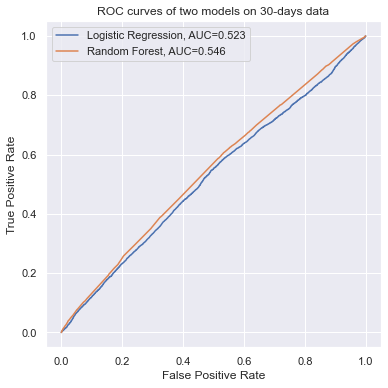

In [98]:
#Plot ROC curves for both models 
from sklearn import metrics

plt.figure(figsize = (6, 6)) 

Y_pred = log_regres.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 3)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

Y_pred = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 3)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

plt.legend()
plt.title('ROC curves of two models on 30-days data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

Applying the same model to the labels for **60 days late payments** 

In [99]:
#Labels for 60 days late payments 

Y_sixty = final_table_temp.late_60_days
Y_sixty = encoder.fit_transform(Y_sixty) 

In [100]:
#Select the best four features based on ANOVA F-value (f_classif()) 
X_final_sixty = KBest.fit_transform(X, Y_sixty)

In [101]:
#Shuffle-split the data
XX_train, YY_train, XX_test, YY_test = shuffle_data(X_final_sixty,Y_sixty)

In [102]:
#Fit the same model 
log_regres.fit(XX_train,YY_train)
random_forest.fit(XX_train,YY_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 5, 10]},
             verbose=1)

In [103]:
#Find the model scores for late-60 days data 
print("Logistic Regression Score :",log_regres.best_score_)
print("Random Forest Score :" ,random_forest.best_score_)

Logistic Regression Score : 0.87829104131108
Random Forest Score : 0.8783505683746562


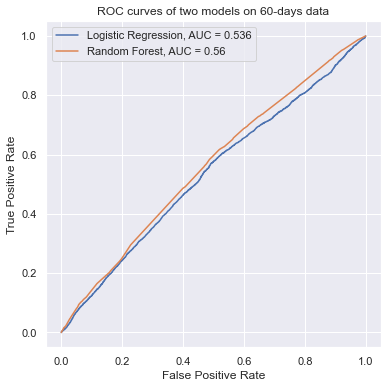

In [104]:
#Plot ROC curves for both models 
plt.figure(figsize = (6, 6)) 

YY_pred = log_regres.predict_proba(XX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(YY_test, YY_pred)
auc = round(metrics.roc_auc_score(YY_test, YY_pred), 3)
plt.plot(fpr,tpr,label = "Logistic Regression, AUC = "+str(auc))

YY_pred = random_forest.predict_proba(XX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(YY_test, YY_pred)
auc = round(metrics.roc_auc_score(YY_test, YY_pred), 3)
plt.plot(fpr,tpr,label = "Random Forest, AUC = "+str(auc))

plt.legend()
plt.title('ROC curves of two models on 60-days data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

The model score becomes marginally higher. We finalize the classification with fitting the model to late-90 days data

In [105]:
#Labels for 90-days late payments 
Y_ninety = final_table_temp.late_90_days
Y_ninety = encoder.fit_transform(Y_ninety) 

In [106]:
#Select the best four features based on ANOVA F-value (f_classif()) 
X_final_ninety = KBest.fit_transform(X, Y_ninety)

In [107]:
#Shuffle-split the data
XXX_train, YYY_train, XXX_test, YYY_test = shuffle_data(X_final_ninety,Y_ninety)

In [108]:
#Fit the same model 
log_regres.fit(XXX_train,YYY_train)
random_forest.fit(XXX_train,YYY_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 5, 10]},
             verbose=1)

In [109]:
#Find the model scores for late-60 days data 
print("Logistic Regression Score :",log_regres.best_score_)
print("Random Forest Score :" ,random_forest.best_score_)

Logistic Regression Score : 0.8884532972512671
Random Forest Score : 0.888529832202259


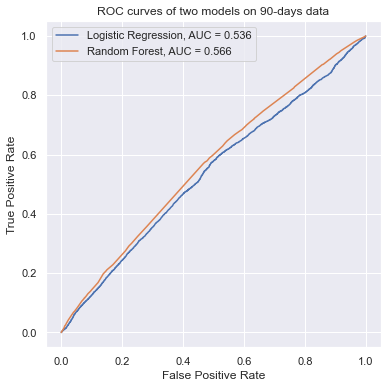

In [110]:
#Plot the ROC curve of both models on 90-days data
plt.figure(figsize = (6, 6)) 

YYY_pred = log_regres.predict_proba(XXX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(YYY_test, YYY_pred)
auc = round(metrics.roc_auc_score(YYY_test, YYY_pred), 3)
plt.plot(fpr,tpr,label = "Logistic Regression, AUC = "+str(auc))

YYY_pred = random_forest.predict_proba(XXX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(YYY_test, YYY_pred)
auc = round(metrics.roc_auc_score(YYY_test, YYY_pred), 3)
plt.plot(fpr,tpr,label = "Random Forest, AUC = "+str(auc))

plt.legend()
plt.title('ROC curves of two models on 90-days data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()

### Comments on the model output and future models
- The ROC curves of both models are close to the diagonal, which designates a line for any random classifier. Based on this outcome, we can conclude that models performances are not ideal. This may be a result of feature encoding or the lack of feature engineering. Both options can be explored to improve the model scores, and ideally, decrease false positive rates. 
- Another possible model one could consider is a regressor to predict the maximum amount of the loan given as a function of the features defined above. Such prediction may give us a measure of the risk that the creditor is taking based on the customer's background and past loan deliquencies. 